# Klasyfikacja bazy danych Covid-19

Baza danych Covid-19 przedstawiająca dane zachorowań populacji. Zawiera 21 kolumn i 1048576 rekordów (w ramach tego projektu pod uwagę są brane pierwsze 20000 rekordów). 

Poszczególne dane oznaczone są cyframi '1' - oznaczającymi 'true' i '2' - oznaczającymi 'false'.

Dane zostały udostępnione przez rząd Meksykański.

### Poszczególne kolumny:
- **usmer**: usmer - wskazuje, czy pacjent był leczony jednostkami medycznymi pierwszego, drugiego lub trzeciego poziomu.
- **medical unit**: jednostka medyczna - rodzaj instytucji Narodowego Systemu Zdrowia, która udzieliła pomocy.
- **sex**: płeć - 1 dla kobiety i 2 dla mężczyzny.
- **patient type**: typ pacjenta - rodzaj opieki, jaką pacjent otrzymał w jednostce. 1 dla pacjentów wróconych do domu i 2 dla hospitalizacji.
- **date died**: data zgonu - jeśli pacjent zmarł, należy podać datę zgonu, a w przeciwnym razie 9999-99-99.
- **intubed**: intubacja - czy pacjent był podłączony do respiratora.
- **pneumonia**: zapalenie płuc - czy pacjent już ma zapalenie pęcherzyków płucnych, czy nie.
- **age**: wiek - pacjenta.
- **pregnancy**: ciąża - czy pacjent jest w ciąży czy nie.
- **diabetes**: cukrzyca - czy pacjent ma cukrzycę czy nie.
- **copd**: POChP - wskazuje, czy pacjent ma przewlekłą obturacyjną chorobę płuc czy nie.
- **asthma**: astma - czy pacjent ma astmę czy nie.
- **inmsupr**: inmsupr - czy pacjent jest immunosupresyjny czy nie.
- **hipertension**: nadciśnienie - czy pacjent ma nadciśnienie czy nie.
- **other disease**: inne choroby - czy pacjent ma inne choroby czy nie.
- **cardiovascular**: sercowo-naczyniowe - czy pacjent ma chorobę serca lub naczyń krwionośnych.
- **obesity**: otyłość - czy pacjent jest otyły czy nie.
- **renal chronic**: przewlekła choroba nerek - czy pacjent ma przewlekłą chorobę nerek czy nie.
- **tobacco**: tytoń - czy pacjent jest użytkownikiem tytoniu.
- **classification**: klasyfikacja - wyniki testu Covid. Wartości od 1 do 3 oznaczają, że pacjent został zdiagnozowany z Covid w różnym stopniu zaawansowania. Wartość 4 lub wyższa oznacza, że pacjent nie jest nosicielem Covid lub że test jest niejednoznaczny.
- **icu**: oddział intensywnej terapii - wskazuje, czy pacjent był przyjęty na Oddział Intensywnej Terapii.

array([[%lt;AxesSubplot:title={'center':'USMER'}%gt;,
 %lt;AxesSubplot:title={'center':'MEDICAL_UNIT'}%gt;,
 %lt;AxesSubplot:title={'center':'SEX'}%gt;,
 %lt;AxesSubplot:title={'center':'PATIENT_TYPE'}%gt;],
 [%lt;AxesSubplot:title={'center':'INTUBED'}%gt;,
 %lt;AxesSubplot:title={'center':'PNEUMONIA'}%gt;,
 %lt;AxesSubplot:title={'center':'AGE'}%gt;,
 %lt;AxesSubplot:title={'center':'PREGNANT'}%gt;],
 [%lt;AxesSubplot:title={'center':'DIABETES'}%gt;,
 %lt;AxesSubplot:title={'center':'COPD'}%gt;,
 %lt;AxesSubplot:title={'center':'ASTHMA'}%gt;,
 %lt;AxesSubplot:title={'center':'INMSUPR'}%gt;],
 [%lt;AxesSubplot:title={'center':'HIPERTENSION'}%gt;,
 %lt;AxesSubplot:title={'center':'OTHER_DISEASE'}%gt;,
 %lt;AxesSubplot:title={'center':'CARDIOVASCULAR'}%gt;,
 %lt;AxesSubplot:title={'center':'OBESITY'}%gt;],
 [%lt;AxesSubplot:title={'center':'RENAL_CHRONIC'}%gt;,
 %lt;AxesSubplot:title={'center':'TOBACCO'}%gt;,
 %lt;AxesSubplot:title={'center':'CLASIFFICATION_FINAL'}%gt;,
 %lt;AxesSubplot:title={'center':'ICU'}%gt;]], dtype=object)

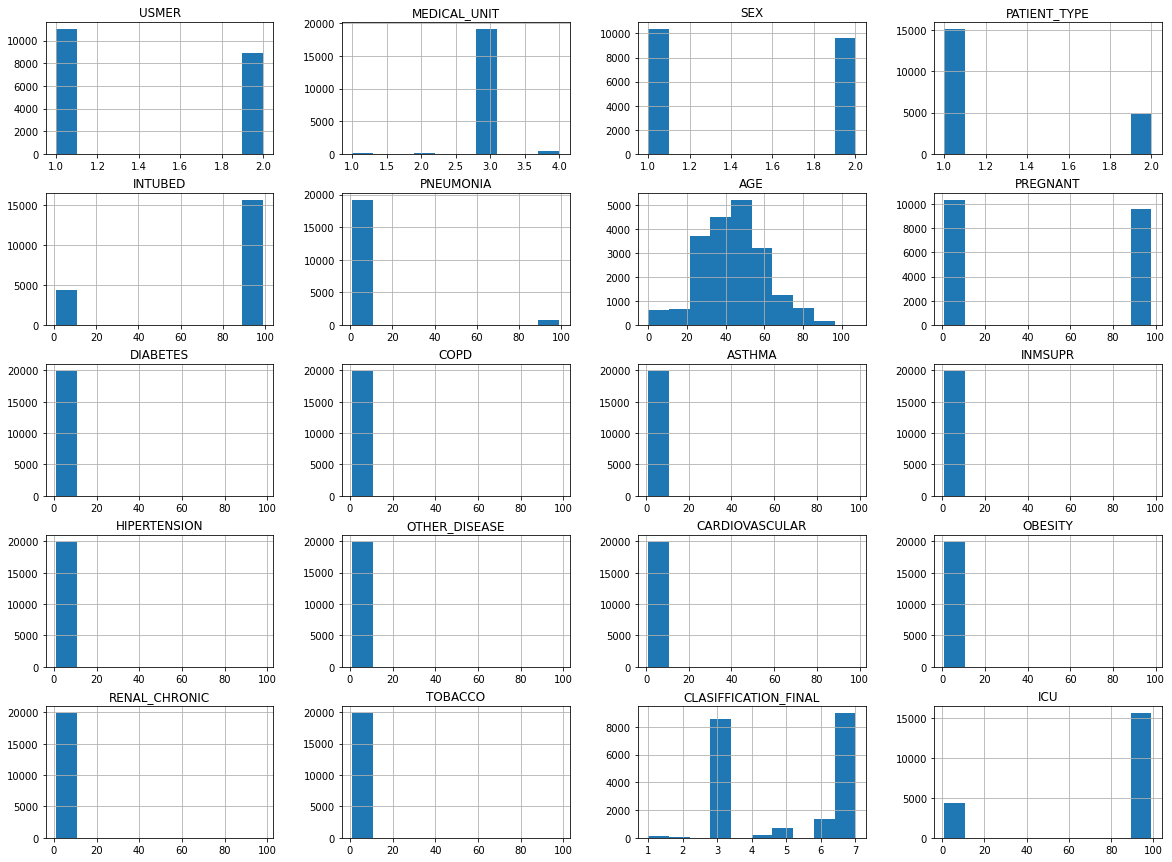

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/data/notebook_files/Covid Data.csv')
df=df.head(20000)
df.hist(figsize=(20, 15))

# Preprocessing bazy danych

Na samym starcie sprawdzamy czy baza nie zawiera braków danych, w takich przypadkach należy je naprawić lub usunąć. Zaczynamy od sprawdzenia liczby brakujących wartości dla każdej kolumny:

In [3]:
df.isnull().sum()

USMER 0
MEDICAL_UNIT 0
SEX 0
PATIENT_TYPE 0
DATE_DIED 0
INTUBED 0
PNEUMONIA 0
AGE 0
PREGNANT 0
DIABETES 0
COPD 0
ASTHMA 0
INMSUPR 0
HIPERTENSION 0
OTHER_DISEASE 0
CARDIOVASCULAR 0
OBESITY 0
RENAL_CHRONIC 0
TOBACCO 0
CLASIFFICATION_FINAL 0
ICU 0
dtype: int64

Sprawdzenie typów danych:

In [4]:
df.dtypes

USMER int64
MEDICAL_UNIT int64
SEX int64
PATIENT_TYPE int64
DATE_DIED object
INTUBED int64
PNEUMONIA int64
AGE int64
PREGNANT int64
DIABETES int64
COPD int64
ASTHMA int64
INMSUPR int64
HIPERTENSION int64
OTHER_DISEASE int64
CARDIOVASCULAR int64
OBESITY int64
RENAL_CHRONIC int64
TOBACCO int64
CLASIFFICATION_FINAL int64
ICU int64
dtype: object

Następnie generujemy statystyki z danych w celu znalezienia odstępstw od normy:

In [5]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.447050,3.001700,1.480250,1.24090,76.482550,5.447700,43.874200,47.689750,2.031600,2.134450,2.123300,2.153900,1.945450,2.224250,2.161550,1.948000,2.125900,2.156750,5.081550,76.511900
std,0.497201,0.252785,0.499622,0.42764,39.200572,18.573107,16.576119,47.473505,4.146741,3.779125,3.902186,4.072449,3.552943,4.844815,4.239298,3.419047,3.841639,4.658644,1.920959,39.162587
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,1.00000,97.000000,2.000000,33.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,97.000000
50%,1.000000,3.000000,1.000000,1.00000,97.000000,2.000000,44.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,97.000000
75%,2.000000,3.000000,2.000000,1.00000,97.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,4.000000,2.000000,2.00000,99.000000,99.000000,107.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


Kolumną która będzie główną do sprawdzenia jest wynik testu (**classification**). Wartości od 1 do 3 oznaczają, że pacjent został zdiagnozowany z Covid w różnym stopniu zaawansowania. Wartość 4 lub wyższa oznacza, że pacjent nie jest nosicielem Covid lub że test jest niejednoznaczny. Dokonano zamiany na wartości 0 i 1. Również w przypadku dat śmierci które wynoszą 9999-99-99.

Test pozytywny: 43.45%
Test negatywny: 56.55%


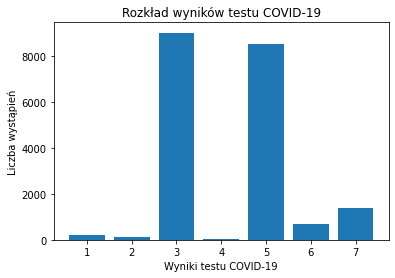

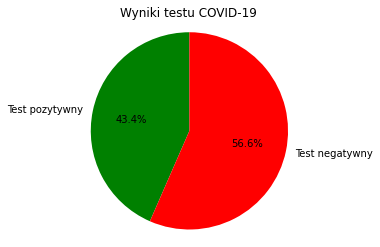

In [6]:
wyniki_testu = df['CLASIFFICATION_FINAL'].unique()
plt.bar(wyniki_testu, df.CLASIFFICATION_FINAL.value_counts())

df['DATE_DIED'] = df['DATE_DIED'].apply(lambda x: 1 if x == '9999-99-99' else 0)

df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x <= 3 else 0)

plt.xlabel("Wyniki testu COVID-19")
plt.ylabel("Liczba wystąpień")
plt.title("Rozkład wyników testu COVID-19")

plt.show()

num_positive = len(df[df.CLASIFFICATION_FINAL == 1])
num_negative = len(df[df.CLASIFFICATION_FINAL == 0])

percent_positive = num_positive / len(df) * 100
percent_negative = num_negative / len(df) * 100

print(f"Test pozytywny: {percent_positive:.2f}%")
print(f"Test negatywny: {percent_negative:.2f}%")

labels = ['Test pozytywny', 'Test negatywny']
sizes = [percent_positive, percent_negative]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Wyniki testu COVID-19')

plt.show()

# Trenowanie i testowanie bazy danych

W pierwszej kolejności należy przygotować dane oraz je ukategoryzować na zbiór treningowy i testowy. W tym przypadku proporcje wynoszą 70/30. Opieramy się na kolumnie CLASIFFCATION_FINAL z wynikiem testu.

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['CLASIFFICATION_FINAL'], axis=1)
y = df['CLASIFFICATION_FINAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Drzewo decyzyjne
Jedno drzewo z głębokością 5, drugie bez głębokości.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


dtc1 = DecisionTreeClassifier(max_depth=5)
dtc1.fit(X_train, y_train)
y_pred = dtc1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Drzewo decyzyjne (5 glebokosci)")
print(f"Dokladnosc:{acc:.4f}")
print(f"Macierz bledu:\n{cm}")


dtc2 = DecisionTreeClassifier(max_depth=None)
dtc2.fit(X_train, y_train)
y_pred = dtc2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Drzewo decyzyjne (bez glebokosci)")
print(f"Dokladnosc:{acc:.4f}")
print(f"Macierz bledu:\n{cm}")

Drzewo decyzyjne (5 glebokosci)
Dokladnosc:0.6328
Macierz bledu:
[[2793  606]
 [1597 1004]]
Drzewo decyzyjne (bez glebokosci)
Dokladnosc:0.5973
Macierz bledu:
[[2619  780]
 [1636  965]]


## Naiwny Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Naiwny Bayes")
print(f"Dokladnosc:{acc:.4f}")
print(f"Macierz bledu:\n{cm}")

Naiwny Bayes
Dokladnosc:0.5852
Macierz bledu:
[[2048 1351]
 [1138 1463]]


## K-Najbliższych Sąsiadów
3 przypadki: 3, 5 i 7 sąsiadów

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("3 najblizszych sasiadow")
print(f"Dokladnosc:{acc:.4f}")
print(f"Macierz bledu:\n{cm}")

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("5 najblizszych sasiadow")
print(f"Dokladnosc:{acc:.4f}")
print(f"Macierz bledu:\n{cm}")

knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_pred = knn7.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("7 najblizszych sasiadow")
print(f"Dokladnosc:{acc:.4f}")
print(f"Macierz bledu:\n{cm}")

3 najblizszych sasiadow
Dokladnosc:0.5793
Macierz bledu:
[[2130 1269]
 [1255 1346]]
5 najblizszych sasiadow
Dokladnosc:0.5798
Macierz bledu:
[[2204 1195]
 [1326 1275]]
7 najblizszych sasiadow
Dokladnosc:0.5867
Macierz bledu:
[[2277 1122]
 [1358 1243]]


/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

## Sieć neuronowa

Na koniec wykonujemy sieć neuronową z wykresami uczenia się. Uczone są 3 sieci neuronowe z różnymi parametrami, użyte są sigmoid i relu. Pierwsza warstwa ma 20 neuronów, natomiast warstwa wyjścia ma 2 z użyciem funkcji softmax.

188/188 [==============================] - 0s 1ms/step
Dokladnosc: 0.6358333333333334
Macierz bledu:
 [[2876  529]
 [1656  939]]
188/188 [==============================] - 0s 1ms/step
Dokladnosc: 0.6423333333333333
Macierz bledu:
 [[3021  384]
 [1762  833]]
188/188 [==============================] - 0s 1ms/step
Dokladnosc: 0.6485
Macierz bledu:
 [[3040  365]
 [1744  851]]


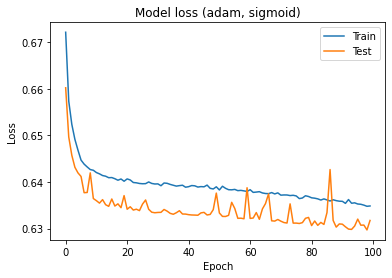

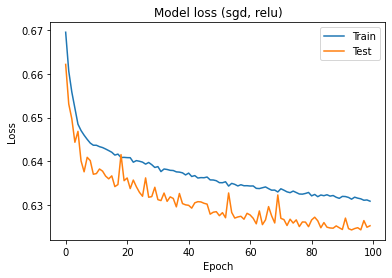

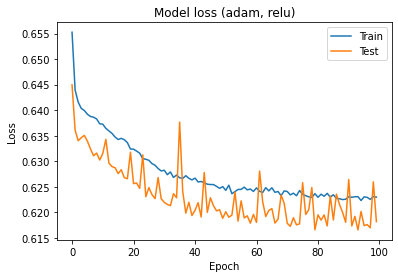

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

target_column = ['CLASIFFICATION_FINAL']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()

X = df[predictors].values
y = df[target_column].values.ravel()

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def train_and_visualize_model(model, optimizer_name, activation_name):
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_test_classes = y_test.argmax(axis=-1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    print("Dokladnosc:", accuracy)
    print("Macierz bledu:\n", conf_matrix)

    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title(f'Model loss ({optimizer_name}, {activation_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

model = Sequential()
model.add(Dense(10, input_dim=20, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
train_and_visualize_model(model, 'adam', 'sigmoid')

model = Sequential()
model.add(Dense(10, input_dim=20, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(2, activation='softmax'))
train_and_visualize_model(model, 'sgd', 'relu')

model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(2, activation='softmax'))
train_and_visualize_model(model, 'adam', 'relu')

## Podsumowanie

Najlepszy wynik dokładności uzyskano z klasyfikatora sieci neuronowych, a konkretnie z sieci z 12 neuronami wejścia. Najgorszy jest w przypadku klasyfikatora K-najbliższych sąsiadów. Prawdopodobnie przy użyciu większej liczby danych, lub pełnej bazy danych, wyniki byłyby lepsze i dokładniejsze.

# Bibliografia

Baza danych na kaggle: [https://www.kaggle.com/datasets/meirnizri/covid19-dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

Oryginalne źródło danych: [https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)